제품 200개의 Lot별 불량 제품 수량 데이터에 대해 p관리도를 구하고 시각화하시오.

1. p관리도에 따라 관리중심선, 관리 상한선, 하한선을 구하시오.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('lot_quality.csv')
df.head()

,lot,생산수량,불량수량
0,1,587,19
1,2,588,15
2,3,455,19
3,4,666,12
4,5,750,15


In [2]:
df['p'] = df['불량수량']/df['생산수량']
df['ucl'] = df['p'] + (3*(df['p'] * (1-df['p'])/df['생산수량'])**0.5)
df['lcl'] = df['p'] - (3*(df['p'] * (1-df['p'])/df['생산수량'])**0.5)

#관리중심선
cl = df['불량수량'].sum()/df['생산수량'].sum()
print('관리중심선 : ',cl)
print(df.head())

관리중심선 :  0.029024320840935338
   lot  생산수량  불량수량         p       ucl       lcl
0    1   587    19  0.032368  0.054282  0.010454
1    2   588    15  0.025510  0.045017  0.006004
2    3   455    19  0.041758  0.069892  0.013625
3    4   666    12  0.018018  0.033481  0.002555
4    5   750    15  0.020000  0.035336  0.004664


2. 관리도를 시각화하시오.

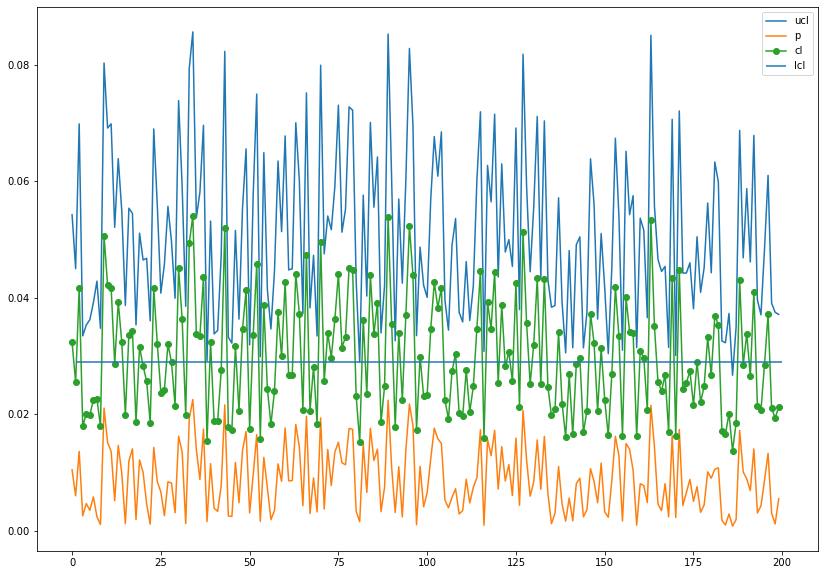

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
plt.plot(df['ucl'])
plt.plot(df['lcl'])
plt.plot(df['p'], marker='o')
plt.hlines(cl,1,200)
plt.legend(['ucl','p','cl','lcl'])